# Диод для молекул в виде клапанной структуры на торце нанотрубки

В работе "Синтетический «демон» Максвелла", опубликованной в журнале «Химия и жизнь», 2001, №12 (http://daju.narod.ru/Maxwell/SintMaxwDem.htm) мною была сформулирована следующая идея: "для реализации идеи Максвелла ... нужно создать такую молекулярную систему, в которой пространственные затруднения для теплового движения молекул рабочей жидкости в одном направлении были бы меньшими, чем в противоположном."

Данную идею я пытался реализовать в следующих работах: 

- "Жидкокристаллический двигатель или акустомеханический преобразователь", 4-6 января 2010 г – 17 июля 2010 г., http://liquidcrystalosmos.narod.ru/liquidcrystalengine.htm

- Жидкокристаллический осмос или о возможности нарушения принципа детального равновесия в жидкокристаллической дисклинации, 17.11.2010, http://liquidcrystalosmos.narod.ru/liquidcrystalosmos.htm

- Жидкокристаллический осмос или о возможности нарушения принципа детального равновесия в жидкокристаллической дисклинации, переработанный и исправленный вариант, Dec 15, 2022,  https://nbviewer.org/github/daju1/articles/blob/master/liquidcrystalosmos/liquidcrystalosmos.ipynb

- Геометрический диод для молекул, https://nbviewer.org/github/daju1/articles/blob/master/diode_for_molecules/diode_for_molecules.ipynb

Для конфигурации клапанной структуры внутри нанотрубки был выполнен расчёт методом молекулярной динамики. За основу молекулярной модели была взята

https://github.com/daju1/moldyn/tree/main/laboro/molecules/nanotrubki/12_0/work_6H_CN_He_21_wbp_xy

На вси z были заданы периодические граничные условия. Это значит, что если атом вылетел за пределы границы расчётной ячейки, перпендикулярной оси z, то считается что он залетел с той же скоростью но с противоположной стороны.

А на осях x, y был использован wall boundary potential, моделирующий твёрдые стенки на границах ячейки, перпендикулярных этим осям


исходные коды программы ghemical, которую я использую для МД моделирования, взяты отсюда
https://www.bioinformatics.org/ghemical/download/release20111012/

Но в целях проведения эксперимента данные коды были модифицированы набором патчей

https://github.com/daju1/winlibghemical/tree/master/linux/release20111012

который в среде докер 

https://github.com/daju1/winlibghemical/tree/master/linux/release20111012/docker

собираются следующим набором комманд

	make download
	make getcodes
	make all

Был разработаны также и рабочий пример для запуска моделирования из консольной программы без визуального интерфейса

https://github.com/daju1/winlibghemical/blob/master/linux/release20111012/examples/example_moldyn.cpp

А непосредственно для запуска моделирования использовался скрипт на основе

https://github.com/daju1/winlibghemical/blob/master/linux/release20111012/examples/example_moldyn.01.sh


В алгоритм программы МД закладываются потенциалы взаимодействия атомов друг с другом, в частности

https://ru.wikipedia.org/wiki/Потенциал_Леннард-Джонса

В программе, которую использовал я, используется

http://open-babel.readthedocs.io/en/latest/Forcefields/ghemical.html


# опции алгоритма МД

B0, B1, B2 в названии файла означает режим оптимизации размера бокса во время процесса МД

B0 - отсутствует оптимизация размера бокса вообще

B1 - оптимизация размера бокса включена постоянно. Этот режим также был включён по умолчанию ранее в предыдущих моделированиях а также в файлах тракторий с отсутствующей буквой B

B2 - только лишь в процессе нагревания и уравновешивания

	enum box_optimization_moldyn_mode
	{
		box_optimization_no = 0,
		box_optimization_always,
		box_optimization_equilibration, // box_optimization just during heating and equilibration
	};

E - алгоритм термостата выключен, моделирование при постоянной энергии

I - инверсия скоростей инициализации начальных скоростей атомов


# Моделирование клапанной структуры на торце нанотрубки

Предварительные исследования данной модели были произведены в следующих работах

Компьютерное моделирование потенциального барьера диффузии инертного газа через мембрану.doc

https://github.com/daju1/moldyn/blob/main/laboro/%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B5%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%BF%D0%BE%D1%82%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%B1%D0%B0%D1%80%D1%8C%D0%B5%D1%80%D0%B0%20%D0%B4%D0%B8%D1%84%D1%84%D1%83%D0%B7%D0%B8%D0%B8%20%D0%B8%D0%BD%D0%B5%D1%80%D1%82%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%B3%D0%B0%D0%B7%D0%B0%20%D1%87%D0%B5%D1%80%D0%B5%D0%B7%20%D0%BC%D0%B5%D0%BC%D0%B1%D1%80%D0%B0%D0%BD%D1%83.doc

Модель нанотрубки 12.0 с клапанным затвором из цианогруппы.doc

https://github.com/daju1/moldyn/blob/main/laboro/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C%20%D0%BD%D0%B0%D0%BD%D0%BE%D1%82%D1%80%D1%83%D0%B1%D0%BA%D0%B8%2012.0%20%D1%81%20%D0%BA%D0%BB%D0%B0%D0%BF%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%20%D0%B7%D0%B0%D1%82%D0%B2%D0%BE%D1%80%D0%BE%D0%BC%20%D0%B8%D0%B7%20%D1%86%D0%B8%D0%B0%D0%BD%D0%BE%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D1%8B.doc

И наконец, в работе 

Моделирование барьера диффузии инертного газа через клапан в нанотрубке

Модель нанотрубки (12.0) с клапанным затвором из цианогруппы

https://github.com/daju1/moldyn/blob/main/laboro/valve_gate_nanotube_12_0.pdf

Был сделан следующий вывод:

<p><i>моделирование при фиксировании у пробного атома только лишь z координаты показало, что 

потенциальная энергия деформации мембранной молекулярной системы Epot 1.45 кДж/моль в прямом направлении и 3.86 кДж/моль в обратном направлении

работа проталкивания пробного атома сквозь мембрану prob\_atom\_fz\_integral 3.746 кДж/моль в прямом направлении и 6.839 кДж/моль в обратном направлении

В той молекулярной модели величина барьера по порядкувеличины соответствует величине средней энергии поступательного движения молекул 1/2*R * T = 0,5 * 8.314 * 300/1000 = 1.247 кДж / моль.</i></p>

Для данного моделирования была построена молекулярная система мембраны с порой в виде нанотрубки на торец которой присоединены 4 цианоформных радикала

https://github.com/daju1/moldyn/tree/main/nanotube_12_membrane_4_tricyanomethyl

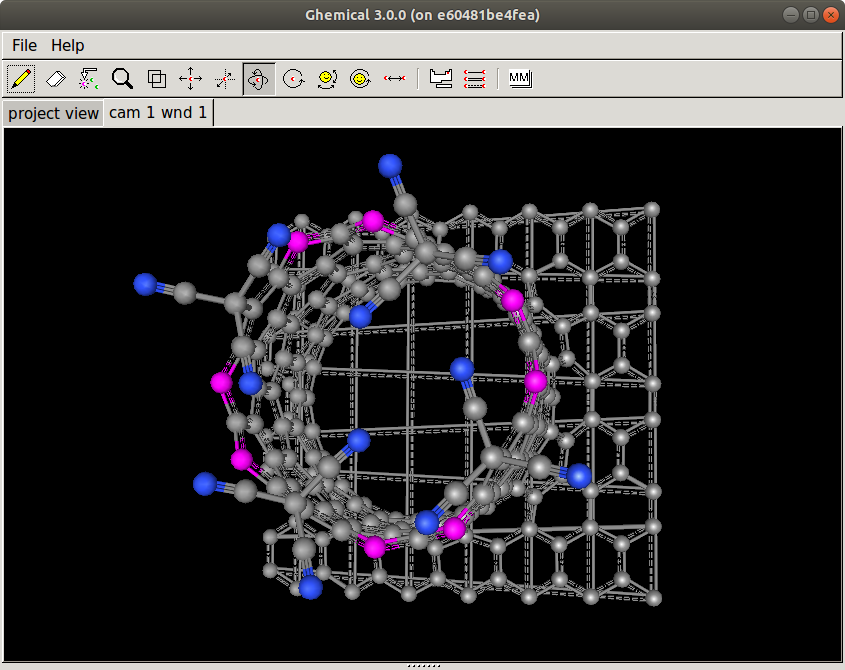

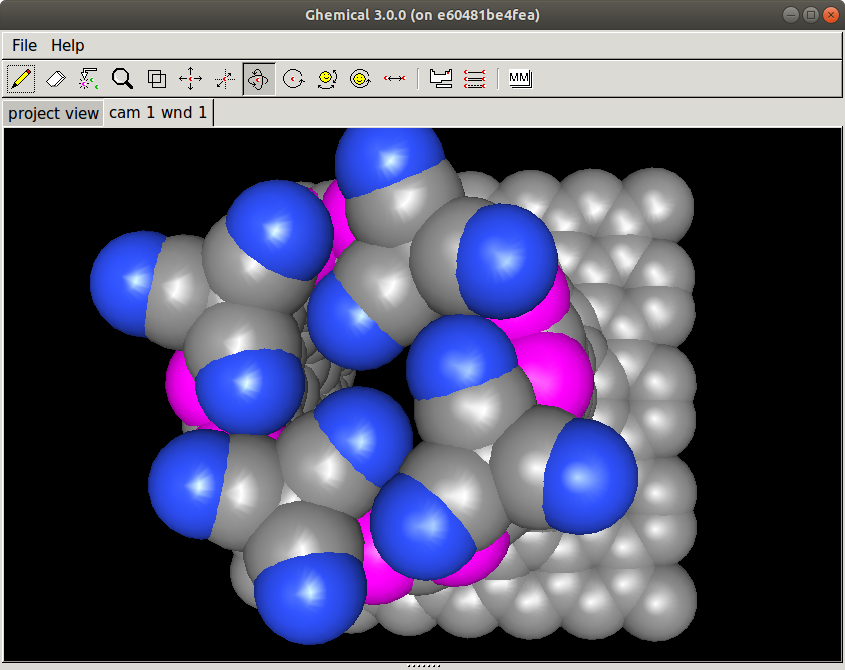

Периодическая ячейка с такой клапанной структурой заполнена молекулами кислорода

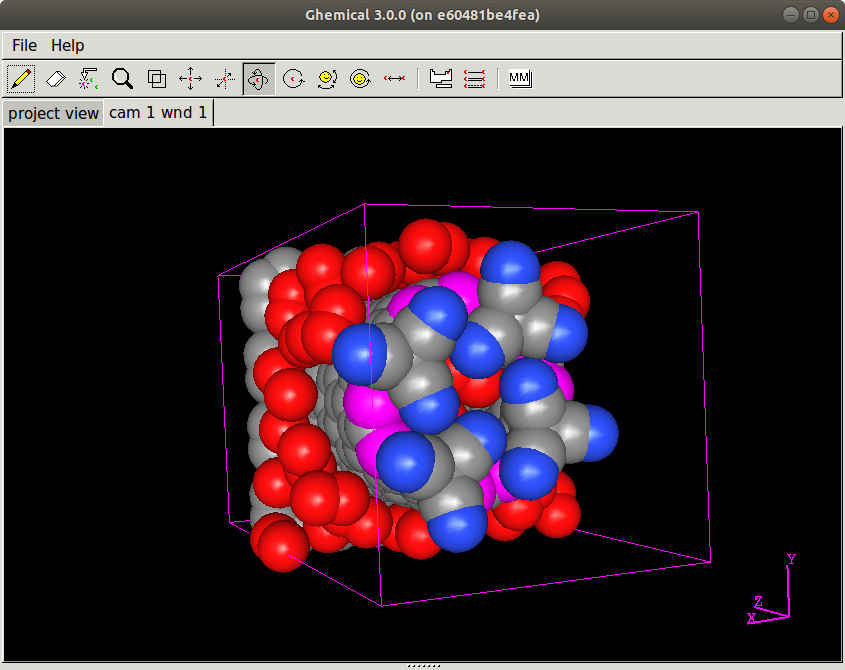

Для презентации результатов моделирования использую следующие функции

# Функция расчёта мощности процесса

In [1]:
def calc_power(this_is_a_gas):
    global header
    global data
    global boundary

    import numpy as np
 
    start_from = int(0.9 * len(data[0]))
    i_cumulative_mean_velocity_m_s = 22
    i_cumulative_mean_force        = 24
    data_cumulative_mean_velocity_m_s = data[i_cumulative_mean_velocity_m_s][start_from:]
    data_cumulative_mean_force        = data[i_cumulative_mean_force       ][start_from:]
    
    cumulative_mean_velocity_m_s =  np.mean(data_cumulative_mean_velocity_m_s)
    # внутрипрограмный параметр "сила" (eng->d1) противонаправлен ускорению. Поэтому действительная сила имеет противоположный знак внутрипрограммному параметру "сила"
    cumulative_mean_force        = -np.mean(data_cumulative_mean_force)
    
    print("cumulative_mean_velocity_m_s =", cumulative_mean_velocity_m_s)
    print("cumulative_mean_force        =", cumulative_mean_force)
    
    s_m_2 = 4*boundary[0]*boundary[1]*(10^-9)^2
    p_ed_izm_Pa_per_atom_ = F_ed_izm_Newton_per_atom / s_m_2
    
    p_os = cumulative_mean_force * p_ed_izm_Pa_per_atom_
    print("p_os, Pascal                 =", p_os)
    V_os = cumulative_mean_velocity_m_s
    print("V_os, m/s                    =", V_os)
    
    if (this_is_a_gas):
        power = 0.5 * p_os * V_os
        print("power, Watt/m^2              =", power)

# Функция загрузки данных моделирования из файла

In [2]:
def fill_data_from_file(fn, print_header = False):
    global header
    global data
    global boundary
    with open(fn) as file:
        while line := file.readline():
            if line.__contains__("the trajectory common time is"):
                print(line)
            lst = line.split(",")
            if len(lst) < 3:
                lst = line.split(" ")
                if len(lst) == 4 and lst[0] == 'boundary':
                    boundary[0] = float(lst[1])
                    boundary[1] = float(lst[2])
                    boundary[2] = float(lst[3])
                    print ("boundary", boundary)
                continue

            if (None == header):
                header = lst
                header_len = len(header)
                if print_header:
                    print(header)
                for i in range(header_len):
                    data += [[]]
            else:
                for i in range(header_len):
                    value = float(lst[i])
                    data[i] += [value]

универсальная газовая постоянная = 8.31446262 $Дж\, К^{-1} Моль^{-1}$

$N_A$ ≡ 6,022 140 76 10^23 $моль^{−1}$

In [3]:
R          = 8.31446262
N_Avogadro = 6.02214076 * 10^23
T          = 300

Анализируя внутрипрограммные формулы можно заметить, что второй закон Ньютона записан в виде $F = -\,m \cdot a$. Подставляя использованные в программе единицы измерения

$[F] = [kg/mol] \cdot [1.0e+12\,m/s^2]$

$[F] = [1.0e+12\,Newton/mol]$

$[F] = [1.66053906717385e-12\,Newton/atom]$

Коеффициент перевода единиц силы из внутрипрограмных единиц в Ньютон на атом

In [4]:
F_ed_izm_Newton_per_mol = 1.0e+12
F_ed_izm_Newton_per_atom = F_ed_izm_Newton_per_mol/N_Avogadro

In [5]:
boundary = [0, 0, 0]

In [6]:
folder = "nanotube_12_membrane_4_tricyanomethyl"
fn = "12.0_4cyanoforms_O2"
suffix = "B2_E"

# Результат моделирования B2, E 300 K

результат моделирования со следующими опциями

- оптимизация размера бокса - только в процессе инициализации (B2)
- функция термостата выключена, моделирование производилось для постоянной энергии (E)
- инициализация начальных скоростей атомов производилась для температуры 300 К

In [7]:
header = None
data = []
fill_data_from_file(folder + "/" + fn + "." + suffix + ".traj.plots.gas.txt")
calc_power(this_is_a_gas = True)

the trajectory common time is 12.246 * 1.0E-9 s

boundary [0.857716, 0.834297, 1.5]
cumulative_mean_velocity_m_s = -0.029051749265905383
cumulative_mean_force        = 0.0018442705508972266
p_os, Pascal                 = 1069.915660355071
V_os, m/s                    = -0.029051749265905383
power, Watt/m^2              = -15.541460750150552


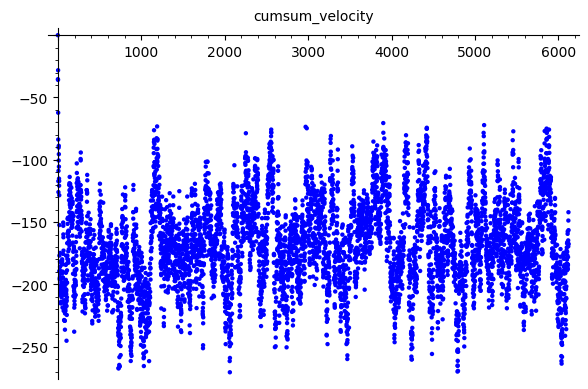

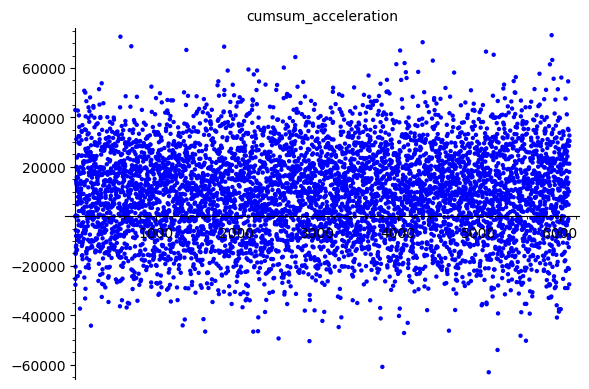

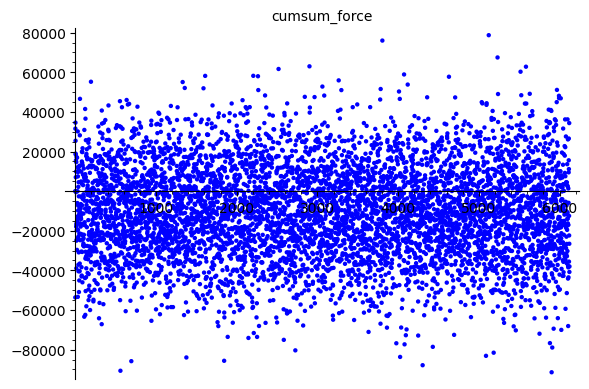

In [8]:
for i in [9, 10, 11]:
    plt = list_plot(data[i])
    plt.show(title=header[i])

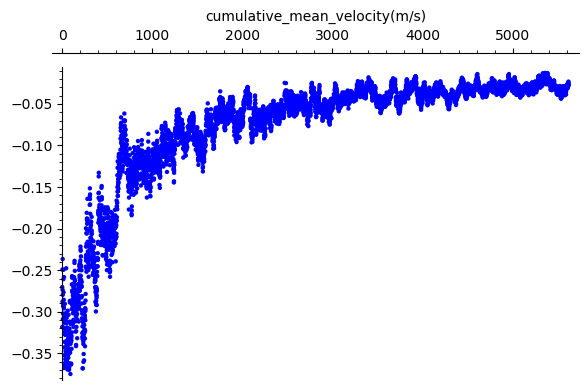

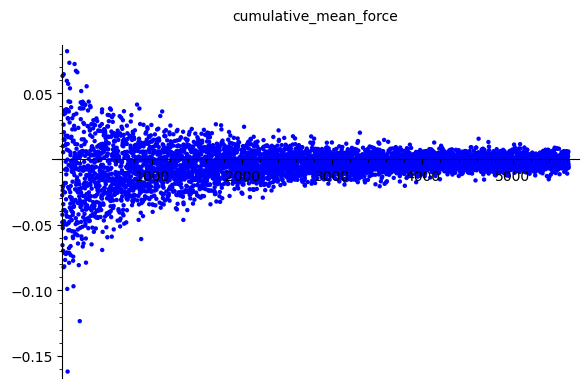

In [9]:
start_from = 500
for i in [22, 24]:
    plt = list_plot(data[i][start_from:])
    plt.show(title=header[i])

In [10]:
header = None
data = []
fill_data_from_file(folder + "/" + fn + "." + suffix + ".traj.plots.membrane.txt")
calc_power(this_is_a_gas = False)

the trajectory common time is 12.246 * 1.0E-9 s

boundary [0.857716, 0.834297, 1.5]
cumulative_mean_velocity_m_s = 0.012676731745513866
cumulative_mean_force        = -0.0018442705508972266
p_os, Pascal                 = -1069.915660355071
V_os, m/s                    = 0.012676731745513866


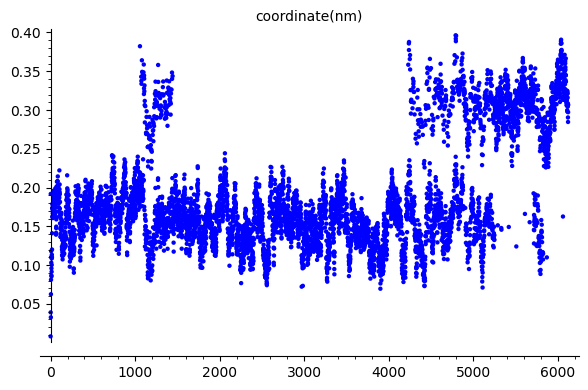

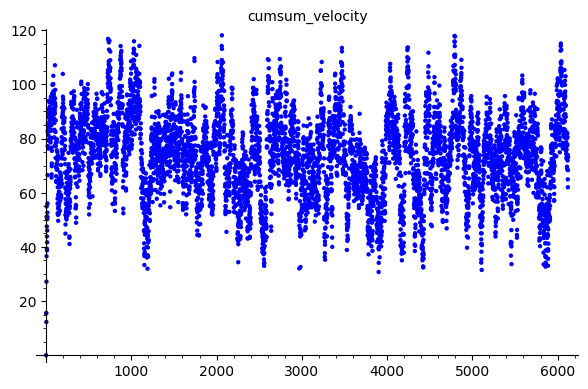

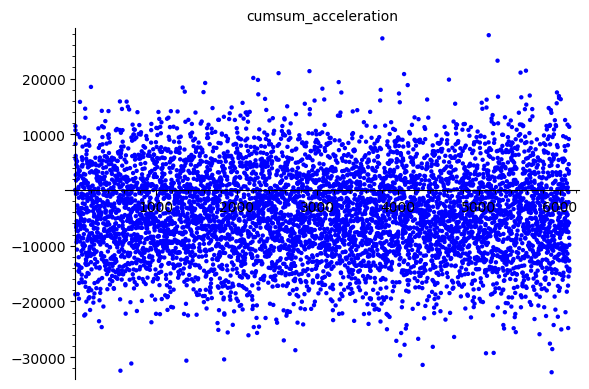

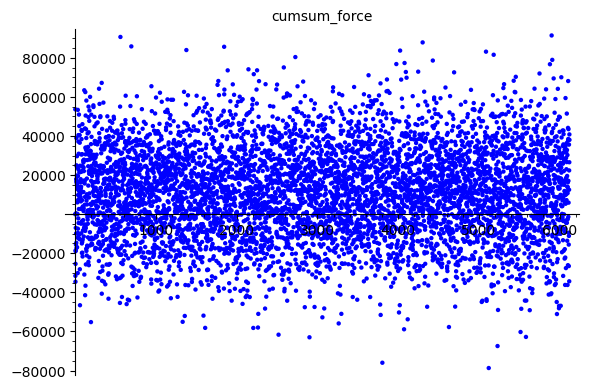

In [11]:
for i in [1, 9, 10, 11]:
    plt = list_plot(data[i])
    plt.show(title=header[i])

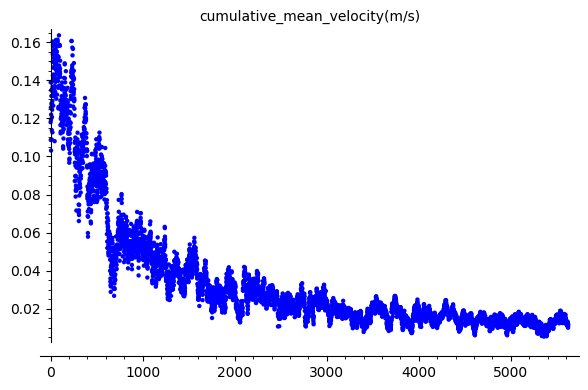

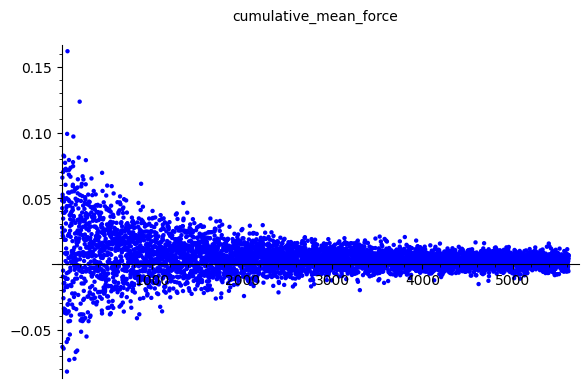

In [12]:
start_from = 500
for i in [22, 24]:
    plt = list_plot(data[i][start_from:])
    plt.show(title=header[i])

# Результат моделирования B2, E 300 K, I

результат моделирования со следующими опциями

- оптимизация размера бокса - только в процессе инициализации (B2)
- функция термостата выключена, моделирование производилось для постоянной энергии (E)
- инициализация начальных скоростей атомов производилась для температуры 300 К

In [13]:
header = None
data = []
fill_data_from_file(folder + "/" + fn + "." + suffix + "_I.traj.plots.gas.txt")
calc_power(this_is_a_gas = True)

the trajectory common time is 12.186 * 1.0E-9 s

boundary [0.842107, 0.846368, 1.5]
cumulative_mean_velocity_m_s = -0.03043967590163935
cumulative_mean_force        = 0.0021806651610655737
p_os, Pascal                 = 1270.139958592638
V_os, m/s                    = -0.03043967590163935
power, Watt/m^2              = -19.331324344640763


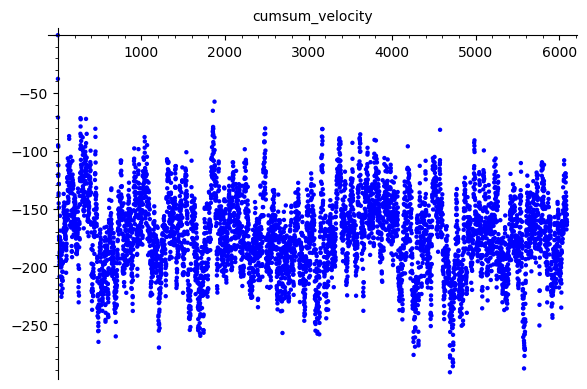

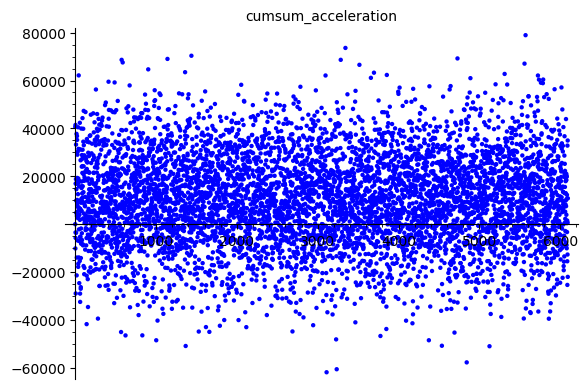

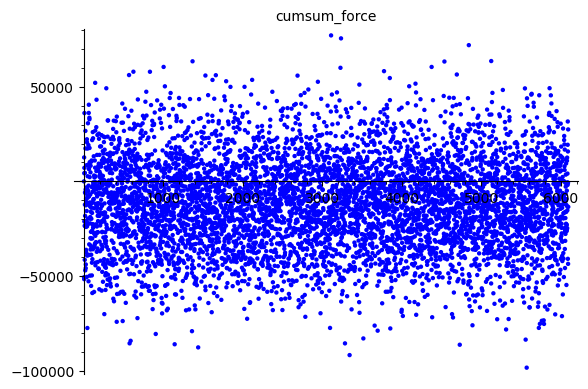

In [14]:
for i in [9, 10, 11]:
    plt = list_plot(data[i])
    plt.show(title=header[i])

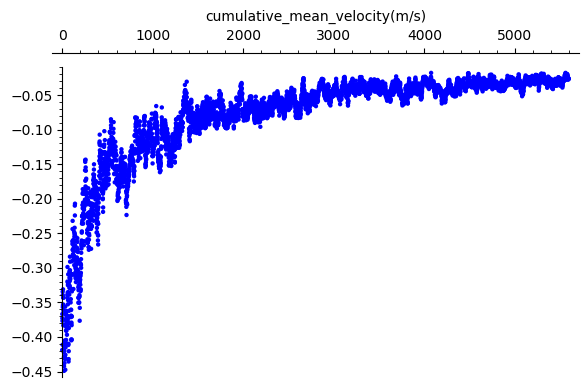

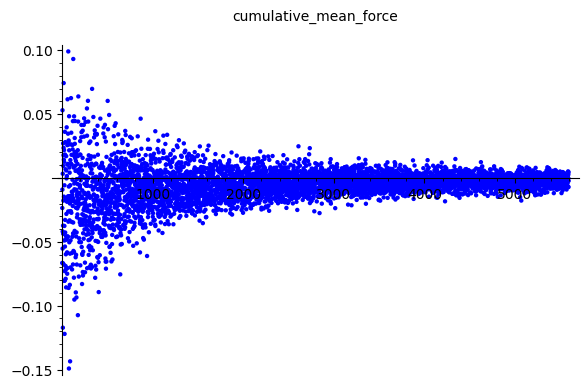

In [15]:
start_from = 500
for i in [22, 24]:
    plt = list_plot(data[i][start_from:])
    plt.show(title=header[i])

In [16]:
header = None
data = []
fill_data_from_file(folder + "/" + fn + "." + suffix + "_I.traj.plots.membrane.txt")
calc_power(this_is_a_gas = False)

the trajectory common time is 12.186 * 1.0E-9 s

boundary [0.842107, 0.846368, 1.5]
cumulative_mean_velocity_m_s = 0.013283680639344262
cumulative_mean_force        = -0.0021806651610655737
p_os, Pascal                 = -1270.139958592638
V_os, m/s                    = 0.013283680639344262


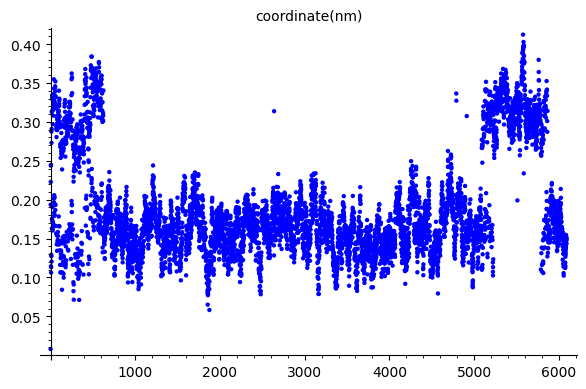

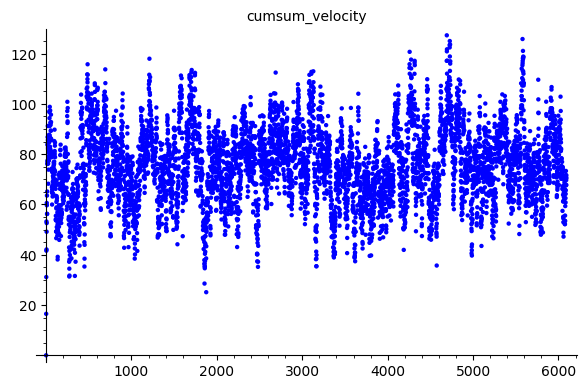

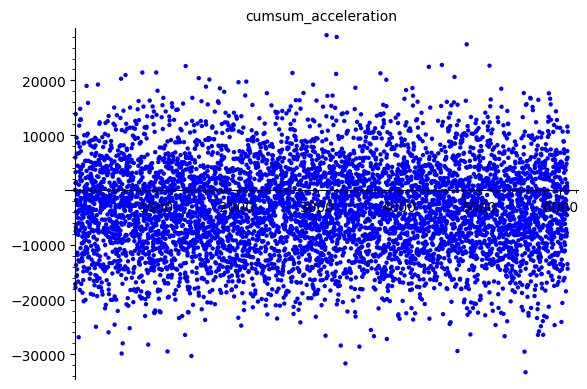

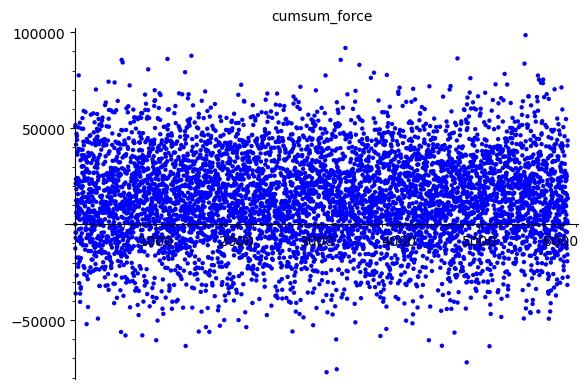

In [17]:
for i in [1, 9, 10, 11]:
    plt = list_plot(data[i])
    plt.show(title=header[i])

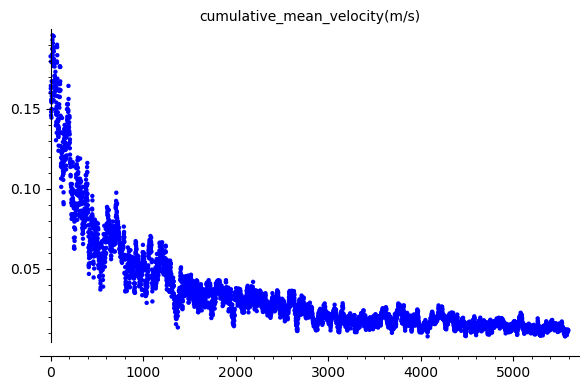

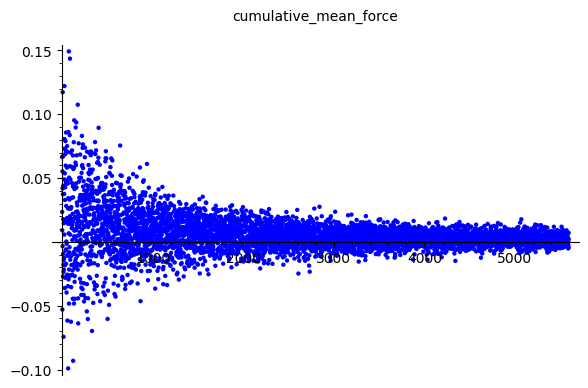

In [18]:
start_from = 500
for i in [22, 24]:
    plt = list_plot(data[i][start_from:])
    plt.show(title=header[i])